# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
# install and import fastai
import sys
!{sys.executable} -m pip install fastai
from fastai.vision.all import *

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# dataset path and basic inspection
# defining where the images are stored and checks how many exist

path = Path('Dataset')

files = get_image_files(path)
print(f"Total images found: {len(files)}")

Total images found: 310


In [3]:
# datablock definition
# defining how images and labels are loaded, split, and transformed

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

Checking for corrupt images...
Found 0 corrupt images.


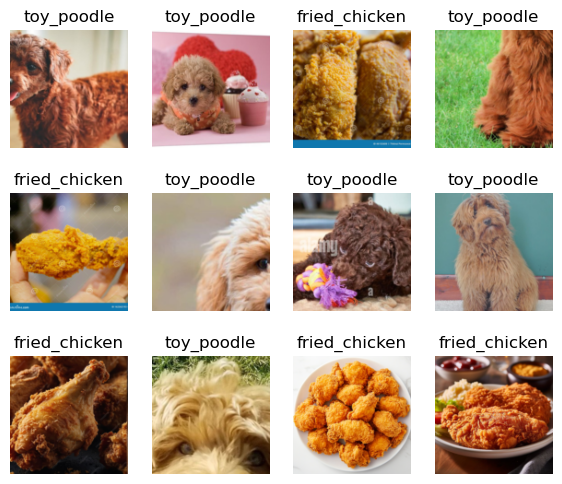

In [4]:
# data validation and visualization
# removing corrupted images and visualizes a sample batch

print("Checking for corrupt images...")
failed = verify_images(get_image_files(path)) # returns list of corrupt images

print(f"Found {len(failed)} corrupt images.")

failed.map(Path.unlink) # remove corrupted files

dls = dblock.dataloaders(path) # create dataloaders and visualize a batch
dls.show_batch(max_n=12, figsize=(7,6))

In [5]:
# model creation and training
# creating a cnn model based on resnet34

learn = vision_learner(dls, resnet34, metrics=error_rate) # create learner
learn.fine_tune(4) # fine-tune the model for 4 epochs

epoch,train_loss,valid_loss,error_rate,time
0,1.181837,1.272286,0.387097,00:22


C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.126185,0.290651,0.161290,00:25
1,0.089679,0.018829,0.016129,00:24
2,0.067004,0.006306,0.000000,00:23
3,0.055012,0.002878,0.000000,00:21


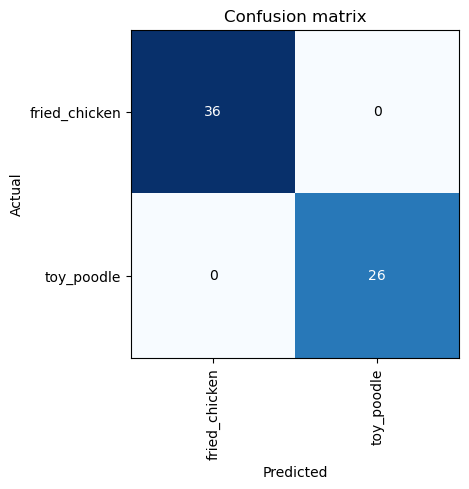

In [6]:
# model evaluation
# evaluating the trained model using a confusion matrix

interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()